# Goblets

De onderstaande gegevens met betrekking tot **prehistorische bekers** (aardewerk) uit Thailand, kan je terug vinden op Canvas (Prehistoric goblets from Thailand.csv).

a.	Plaats de gegevens in het dataframe goblets


In [3]:
import pandas as pd

goblets = pd.read_csv('datasets/Prehistoric goblets from Thailand.csv', sep=';', index_col=0)

25

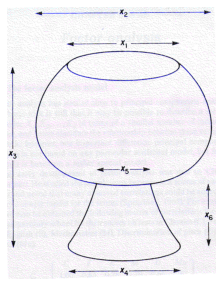

In [8]:
# keep
from scripts.cursus_code import plot_images
plot_images(['images/goblet.png'], figsize=(5,5))
goblets.head()
len(goblets)

In [ ]:
# zie intro

b.	Welke kolommen dien je te verwijderen om een Principale-Componenten Analyse te kunnen uitvoeren?
Verwijder eventuele kolommen met de verkeerde meetschaal, kolommen die niet zinvol zijn,….

In [ ]:
goblets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      25 non-null     int64
 1   X2      25 non-null     int64
 2   X3      25 non-null     int64
 3   X4      25 non-null     int64
 4   X5      25 non-null     int64
 5   X6      25 non-null     int64
dtypes: int64(6)
memory usage: 1.4 KB


c.	Voer een Principale-Componenten Analyse uit en interpreteer de resultaten.

In [ ]:
from pca import pca

model = pca(normalize=True)
out = model.fit_transform(goblets, verbose=False)
out['loadings']
out['topfeat']
out['explained_var']
# de eerste 3 PC's verklaren reeds 95,8% van de variantie

,X1,X2,X3,X4,X5,X6
PC1,-0.366023,-0.451537,-0.411161,-0.461859,-0.296365,-0.438112
PC2,0.485929,-0.034127,-0.441352,-0.114575,0.682771,-0.297680
PC3,0.617933,-0.375273,-0.316350,0.158837,-0.491454,0.332408
PC4,-0.324368,-0.674274,0.020195,0.541191,0.359210,0.133462
PC5,0.278356,-0.083919,0.382545,0.381826,-0.221361,-0.757854
PC6,0.255658,-0.438671,0.623963,-0.556463,0.162579,0.129589


,PC,feature,loading,type
0,PC1,X4,-0.461859,best
1,PC2,X5,0.682771,best
2,PC3,X1,0.617933,best
3,PC4,X2,-0.674274,best
4,PC5,X6,-0.757854,best
5,PC6,X3,0.623963,best


array([0.71196296, 0.89399253, 0.95811715, 0.98184987, 0.99273215,
       1.        ])

d.	Maak een plot en biplot

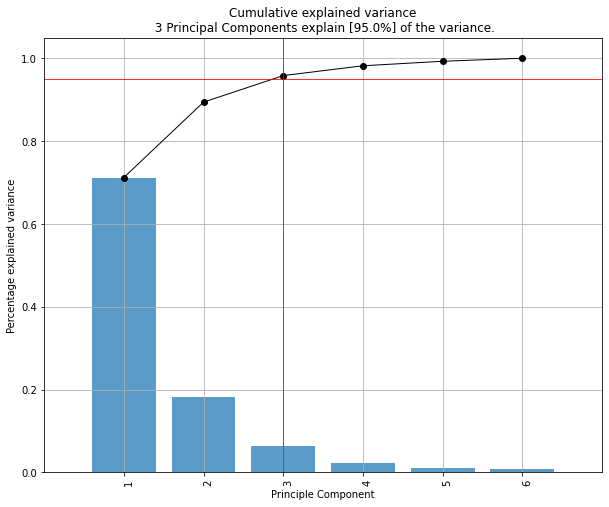

<Figure size 432x288 with 0 Axes>

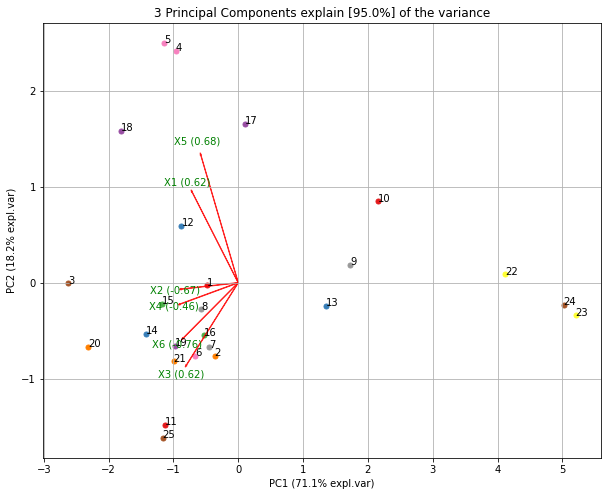

In [ ]:
_ = model.plot()
_ = model.biplot(legend=False)

e.	Maak een nieuw dataframe verhoudingen aan met de volgende variabelen:
 * V1 = X2/X1
 * V2 = X2/X4
 * V3 = X1/X4
 * V4 = X2/X5
 * V5 = X1/X5
 * V6 = X4/X5
 * V7 = X3/X6

In [ ]:
goblets_2 = pd.DataFrame(zip(goblets.X2 / goblets.X1,
                             goblets.X2 / goblets.X4,
                             goblets.X1 / goblets.X4,
                             goblets.X2 / goblets.X5,
                             goblets.X1 / goblets.X5,
                             goblets.X4 / goblets.X5,
                             goblets.X3 / goblets.X6), columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7'])

f.	Voer een Principale-Componenten Analyse uit op de dataframe verhoudingen en interpreteer de resultaten.

In [ ]:
model = pca(normalize=True)
out = model.fit_transform(goblets_2, verbose=False)
out['loadings']
out['topfeat']
out['explained_var']

,V1,V2,V3,V4,V5,V6,V7
PC1,-0.266587,0.490320,0.546186,0.209993,0.423897,-0.155035,0.377329
PC2,0.163536,-0.073362,-0.120531,0.604039,0.408393,0.631817,-0.150021
PC3,0.731292,0.370807,-0.179023,0.206130,-0.254739,-0.113335,0.418854
PC4,-0.206694,-0.411875,-0.189459,-0.140537,0.038149,0.271655,0.810395
PC5,-0.105612,-0.251573,-0.440946,0.411299,0.317773,-0.678459,0.025913
PC6,-0.023256,0.464434,-0.547543,-0.493485,0.476063,0.109455,-0.042575
PC7,0.559448,-0.409972,0.353514,-0.340743,0.509474,-0.133582,-0.021324


,PC,feature,loading,type
0,PC1,V3,0.546186,best
1,PC2,V6,0.631817,best
2,PC3,V1,0.731292,best
3,PC4,V7,0.810395,best
4,PC5,V6,-0.678459,best
5,PC6,V3,-0.547543,best
6,PC7,V1,0.559448,best
7,PC1,V2,0.490320,weak
8,PC2,V4,0.604039,weak
9,PC7,V5,0.509474,weak


array([0.4336619 , 0.74589167, 0.93438399, 0.99683595, 0.99844758,
       0.99937036, 1.        ])

g.	Maak een plot en biplot

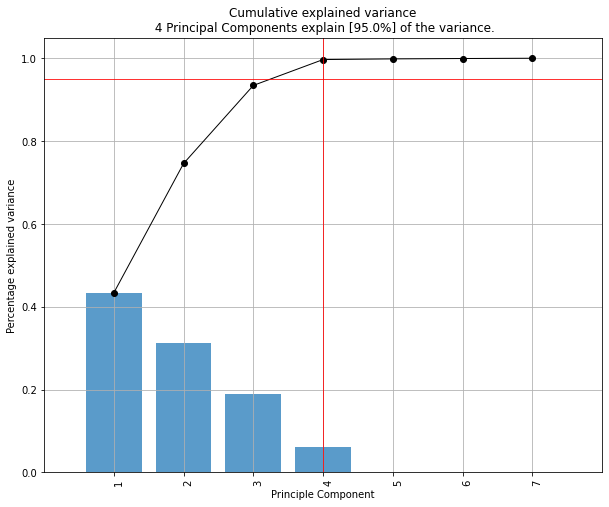

<Figure size 432x288 with 0 Axes>

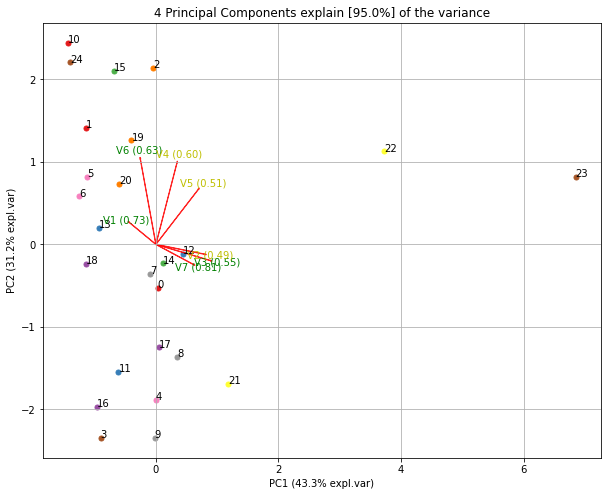

In [ ]:
_ = model.plot()
_ = model.biplot(legend=False)

h.	Vergelijk de resultaten van beide Principale Componenten Analyse en formuleer een conclusie (Kijk eventueel ook naar de gemiddelde absolute correlaties).

In [ ]:
goblets.corr().abs().mean().mean()
goblets_2.corr().abs().mean().mean()
# de verhoudingen zijn onderling minder sterk gecorreleerd en daardoor verklaren de eerste PC-componenten
# van de tweede PCA minder


0.7003348376208017

0.4885938238518179